<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/blessle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/oldmonthtest1.csv')
df

,month,spi1,sl1,avg solar,avg R.HUM
0,01-10-1979,1.273802,0.143235,21.034567,0.660878
1,01-11-1979,2.145778,1.273802,18.618270,0.672347
2,01-12-1979,0.889794,2.145778,23.606018,0.632411
3,01-01-1980,-1.714817,0.889794,23.687354,0.680302
4,01-02-1980,-1.469306,-1.714817,22.860871,0.749740
...,...,...,...,...,...
411,01-01-2014,0.317544,0.143235,12.783414,0.946414
412,01-02-2014,0.546507,0.317544,11.613665,0.959161
413,01-03-2014,0.629004,0.546507,21.052941,0.892296
414,01-04-2014,0.174373,0.629004,17.347204,0.902577


In [4]:
 df['date_time'] = pd.to_datetime(df['month'], infer_datetime_format=True)


In [5]:
 df.index = pd.to_datetime(df['date_time'], format='%d.%m.%Y')
 df = df.drop(columns = ['month','date_time'])
 df

,spi1,sl1,avg solar,avg R.HUM
date_time,,,,
1979-01-10,1.273802,0.143235,21.034567,0.660878
1979-01-11,2.145778,1.273802,18.618270,0.672347
1979-01-12,0.889794,2.145778,23.606018,0.632411
1980-01-01,-1.714817,0.889794,23.687354,0.680302
1980-01-02,-1.469306,-1.714817,22.860871,0.749740
...,...,...,...,...
2014-01-01,0.317544,0.143235,12.783414,0.946414
2014-01-02,0.546507,0.317544,11.613665,0.959161
2014-01-03,0.629004,0.546507,21.052941,0.892296


In [6]:
def df_to_X_y2(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [7]:
X, y = df_to_X_y2(df)
X.shape, y.shape

((411, 5, 4), (411,))

In [8]:
X_train, y_train = X[:155], y[:155]
X_val, y_val = X[155:310], y[155:310]
X_test, y_test = X[310:], y[310:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((155, 5, 4), (155,), (155, 5, 4), (155,), (101, 5, 4), (101,))

In [9]:
temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 1])
temp_training_std = np.std(X_train[:, :, 1])

                           
def preprocess(X):
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean) / temp_training_std
  return X


temp_training_mean = np.mean(X_train[:, :, 2])
temp_training_std = np.std(X_train[:, :, 2])

                           
def preprocess(X):
  X[:, :, 2] = (X[:, :, 2] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

                           
def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

                           
def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X  
#temp_training_mean = np.mean(X_train[:, :, 4])
#temp_training_std = np.std(X_train[:, :, 4])

                           
#def preprocess(X):
#  X[:, :, 4] = (X[:, :, 4] - temp_training_mean) / temp_training_std
 # return X  

In [ ]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [11]:
p_training_mean3 = np.mean(X_train[:, :, 0])
p_training_std3 = np.std(X_train[:, :, 0])

def preprocess_output3(y):
  y[:] = (y[:] - p_training_mean3) / p_training_std3
  return y

In [ ]:
preprocess_output3(y_train)
preprocess_output3(y_val)
preprocess_output3(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

model4 = Sequential()
model4.add(InputLayer((5, 4)))
model4.add(Bidirectional(LSTM(1000)))
model4.add(Dropout(0.5))
model4.add(Dropout(0.5))
model4.add(Dense(10, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

In [41]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss="mse", optimizer=Adam(learning_rate=0.0001), metrics=['mse'])

In [43]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=2)
history=model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100,batch_size=30)#,callbacks=[early_stopping])

Epoch 1/100
6/6 [==============================] - 4s 709ms/step - loss: 0.5927 - mse: 0.5927 - val_loss: 0.7931 - val_mse: 0.7931
Epoch 2/100
6/6 [==============================] - 2s 431ms/step - loss: 0.6115 - mse: 0.6115 - val_loss: 0.8101 - val_mse: 0.8101
Epoch 3/100
6/6 [==============================] - 2s 420ms/step - loss: 0.6169 - mse: 0.6169 - val_loss: 0.7832 - val_mse: 0.7832
Epoch 4/100
6/6 [==============================] - 2s 431ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.7521 - val_mse: 0.7521
Epoch 5/100
6/6 [==============================] - 2s 420ms/step - loss: 0.6448 - mse: 0.6448 - val_loss: 0.7648 - val_mse: 0.7648
Epoch 6/100
6/6 [==============================] - 2s 423ms/step - loss: 0.6031 - mse: 0.6031 - val_loss: 0.7733 - val_mse: 0.7733
Epoch 7/100
6/6 [==============================] - 2s 425ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 0.7580 - val_mse: 0.7580
Epoch 8/100
6/6 [==============================] - 2s 430ms/step - loss: 0.6133 - m

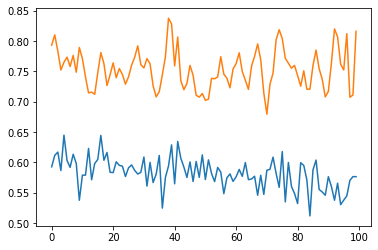

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

def postprocess_temp(arr):
  arr = (arr*temp_training_std) + temp_training_mean
  return arr

In [45]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  
  temp_preds = postprocess_temp(predictions)
  temp_actuals =postprocess_temp(y)
  print(predictions.shape)
  print(y.shape)
  df = pd.DataFrame(data={'SPI-1 Predictions': temp_preds,
                          'SPI-1 Actuals':temp_actuals,
                          })
  plt.plot(df['SPI-1 Predictions'][start:end])
  plt.plot(df['SPI-1 Actuals'][start:end])
  return df[start:end]

(101,)
(101,)


,SPI-1 Predictions,SPI-1 Actuals
0,0.761542,0.870034
1,0.765094,0.746093
2,0.844169,0.870034
3,0.897044,0.764958
4,0.837656,0.663060
...,...,...
95,0.555309,0.779689
96,0.685374,0.803349
97,0.765083,0.834427
98,0.856514,0.845624


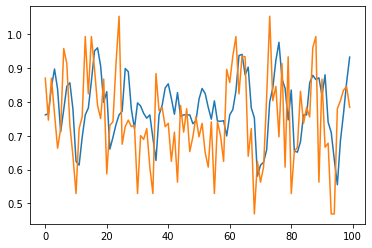

In [46]:

post_processed_df = plot_predictions2(model4, X_test, y_test)
post_processed_df



In [ ]:
import math 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

mae1=mae(x,y)
mse1=mse((df['Temperature Actuals'][start:end]),(df['Temperature Predictions'][start:end]))
rmse1=np.sqrt(mse1)
r2 = r2_score((df['Temperature Actuals'][start:end]),(df['Temperature Predictions'][start:end]))
print('Mean square error =', mse1)
print('Mean absolute error =', mae1)
print('Root mean square error=', rmse1)
print('r2 score =', r2)


KeyError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  print(predictions.shape)
  print(y.shape)
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(107,)
(107,)


(     Predictions   Actuals
 0       0.183951 -0.746416
 1      -0.058177  0.370000
 2       0.017963 -0.336389
 3      -0.226638 -0.489013
 4      -0.500716 -0.489013
 ..           ...       ...
 102    -0.930384  0.324249
 103     0.174775  0.545929
 104     0.836938  0.625802
 105     0.857685  0.185632
 106     0.534975  1.124725
 
 [107 rows x 2 columns], 0.9775790004578795)

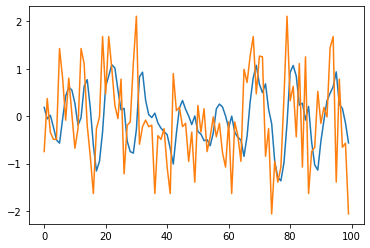

In [ ]:
plot_predictions1(model4, X_test, y_test)
